In [22]:
import warnings
warnings.filterwarnings('ignore')

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
dataset = data_dict 

In [23]:
#https://bbs.csdn.net/topics/390821957
import pandas as pd
dataset=pd.DataFrame(dataset)
dataset=pd.DataFrame.transpose(dataset)
dataset.head()


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [5]:
dataset.shape

(146, 21)

In [ ]:
#该数据有146个人，21个属性。其中属性里面可能包含“NaN“，需要清理

In [46]:
dataset.isnull().any()
#每一列都有nan

bonus                        False
deferral_payments            False
deferred_income              False
director_fees                False
email_address                False
exercised_stock_options      False
expenses                     False
from_messages                False
from_poi_to_this_person      False
from_this_person_to_poi      False
loan_advances                False
long_term_incentive          False
other                        False
poi                          False
restricted_stock             False
restricted_stock_deferred    False
salary                       False
shared_receipt_with_poi      False
to_messages                  False
total_payments               False
total_stock_value            False
dtype: bool

In [53]:
dataset=pd.DataFrame.transpose(dataset)
dataset.isnull().any()
#每一个人都有nan

ALLEN PHILLIP K                  False
BADUM JAMES P                    False
BANNANTINE JAMES M               False
BAXTER JOHN C                    False
BAY FRANKLIN R                   False
BAZELIDES PHILIP J               False
BECK SALLY W                     False
BELDEN TIMOTHY N                 False
BELFER ROBERT                    False
BERBERIAN DAVID                  False
BERGSIEKER RICHARD P             False
BHATNAGAR SANJAY                 False
BIBI PHILIPPE A                  False
BLACHMAN JEREMY M                False
BLAKE JR. NORMAN P               False
BOWEN JR RAYMOND M               False
BROWN MICHAEL                    False
BUCHANAN HAROLD G                False
BUTTS ROBERT H                   False
BUY RICHARD B                    False
CALGER CHRISTOPHER F             False
CARTER REBECCA C                 False
CAUSEY RICHARD A                 False
CHAN RONNIE                      False
CHRISTODOULOU DIOMEDES           False
CLINE KENNETH W          

In [77]:


for columns in dataset.columns:
    k=0
    for value in dataset[columns]:
        if value == 'NaN':
            k += 1
            p = 100.0*k/len(dataset[columns])
    print columns,k,p

bonus 64 43.8356164384
deferral_payments 107 73.2876712329
deferred_income 97 66.4383561644
director_fees 129 88.3561643836
email_address 35 23.9726027397
exercised_stock_options 44 30.1369863014
expenses 51 34.9315068493
from_messages 60 41.095890411
from_poi_to_this_person 60 41.095890411
from_this_person_to_poi 60 41.095890411
loan_advances 142 97.2602739726
long_term_incentive 80 54.7945205479
other 53 36.301369863
poi 0 36.301369863
restricted_stock 36 24.6575342466
restricted_stock_deferred 128 87.6712328767
salary 51 34.9315068493
shared_receipt_with_poi 60 41.095890411
to_messages 60 41.095890411
total_payments 21 14.3835616438
total_stock_value 20 13.698630137


In [78]:
dataset=pd.DataFrame.transpose(dataset)
for columns in dataset.columns:
    k=0
    for value in dataset[columns]:
        if value == 'NaN':
            k += 1
            p = 100.0*k/len(dataset[columns])
    print columns,k,p

ALLEN PHILLIP K 2 9.52380952381
BADUM JAMES P 15 71.4285714286
BANNANTINE JAMES M 5 23.8095238095
BAXTER JOHN C 9 42.8571428571
BAY FRANKLIN R 9 42.8571428571
BAZELIDES PHILIP J 13 61.9047619048
BECK SALLY W 7 33.3333333333
BELDEN TIMOTHY N 4 19.0476190476
BELFER ROBERT 14 66.6666666667
BERBERIAN DAVID 13 61.9047619048
BERGSIEKER RICHARD P 5 23.8095238095
BHATNAGAR SANJAY 8 38.0952380952
BIBI PHILIPPE A 5 23.8095238095
BLACHMAN JEREMY M 5 23.8095238095
BLAKE JR. NORMAN P 16 76.1904761905
BOWEN JR RAYMOND M 5 23.8095238095
BROWN MICHAEL 12 57.1428571429
BUCHANAN HAROLD G 5 23.8095238095
BUTTS ROBERT H 10 47.619047619
BUY RICHARD B 4 19.0476190476
CALGER CHRISTOPHER F 5 23.8095238095
CARTER REBECCA C 6 28.5714285714
CAUSEY RICHARD A 5 23.8095238095
CHAN RONNIE 16 76.1904761905
CHRISTODOULOU DIOMEDES 16 76.1904761905
CLINE KENNETH W 17 80.9523809524
COLWELL WESLEY 5 23.8095238095
CORDES WILLIAM R 11 52.380952381
COX DAVID 5 23.8095238095
CUMBERLAND MICHAEL S 12 57.1428571429
DEFFNER JOSEP

In [ ]:
#最高的前五个
loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
#最高的前五个人
LOCKHART EUGENE E                20
GRAMM WENDY L                    18
WROBEL BRUCE                     18
WHALEY DAVID A                   18
THE TRAVEL AGENCY IN THE PARK    18

In [80]:
dataset=pd.DataFrame.transpose(dataset)
dataset.loc["LOCKHART EUGENE E",:]
#发现除了poi，都是空值，应该注意

bonus                          NaN
deferral_payments              NaN
deferred_income                NaN
director_fees                  NaN
email_address                  NaN
exercised_stock_options        NaN
expenses                       NaN
from_messages                  NaN
from_poi_to_this_person        NaN
from_this_person_to_poi        NaN
loan_advances                  NaN
long_term_incentive            NaN
other                          NaN
poi                          False
restricted_stock               NaN
restricted_stock_deferred      NaN
salary                         NaN
shared_receipt_with_poi        NaN
to_messages                    NaN
total_payments                 NaN
total_stock_value              NaN
Name: LOCKHART EUGENE E, dtype: object

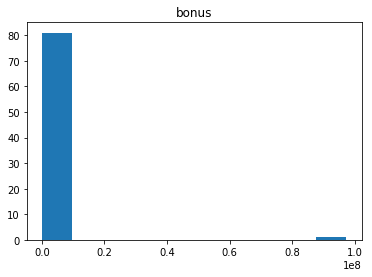

bonus TOTAL


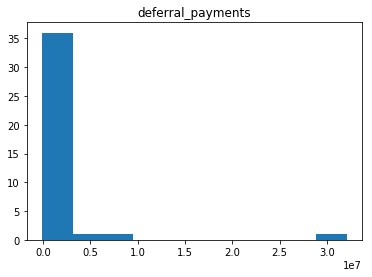

deferral_payments TOTAL


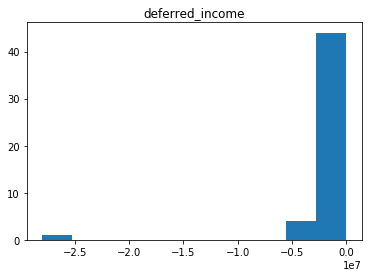

deferred_income BOWEN JR RAYMOND M


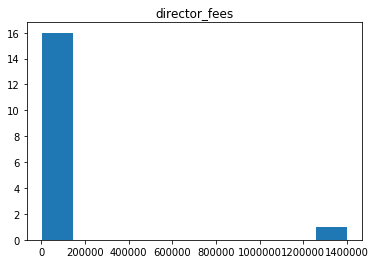

director_fees TOTAL


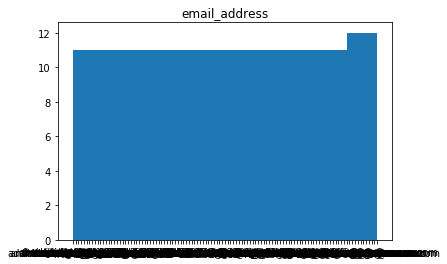

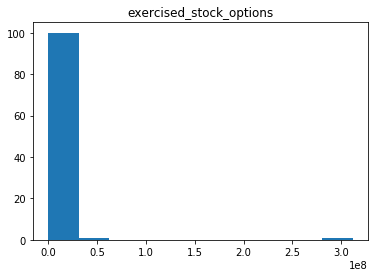

exercised_stock_options TOTAL


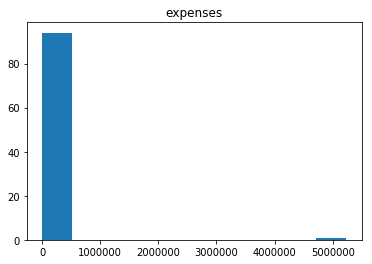

expenses TOTAL


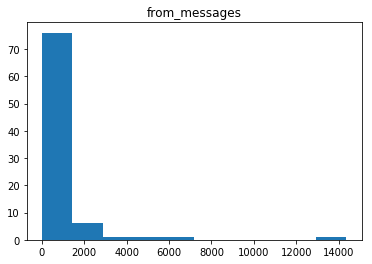

from_messages KAMINSKI WINCENTY J


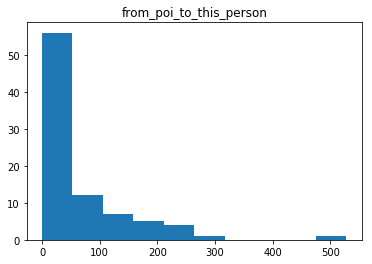

from_poi_to_this_person LAVORATO JOHN J


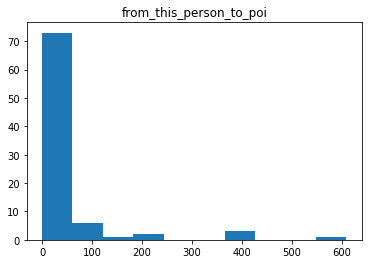

from_this_person_to_poi DELAINEY DAVID W


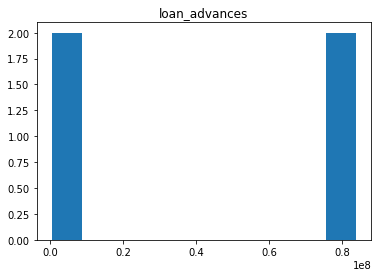

loan_advances TOTAL


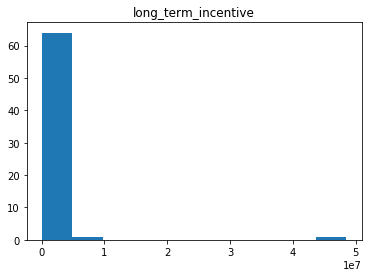

long_term_incentive TOTAL


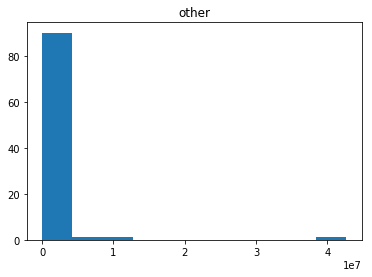

other TOTAL


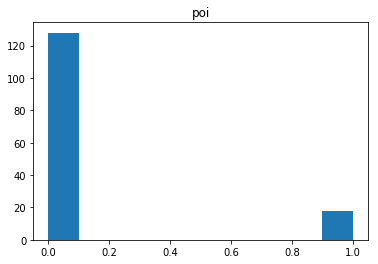

poi BELDEN TIMOTHY N


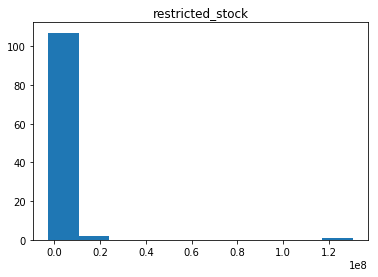

restricted_stock TOTAL


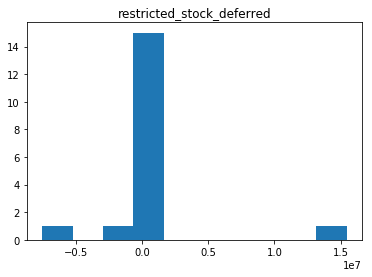

restricted_stock_deferred BHATNAGAR SANJAY


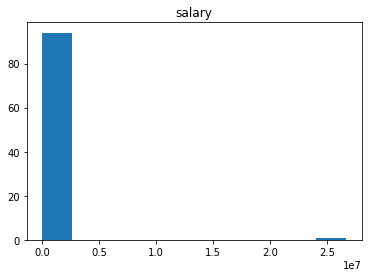

salary TOTAL


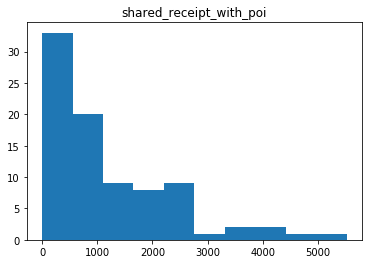

shared_receipt_with_poi BELDEN TIMOTHY N


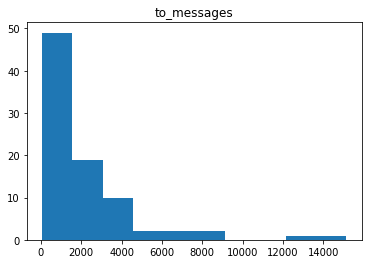

to_messages SHAPIRO RICHARD S


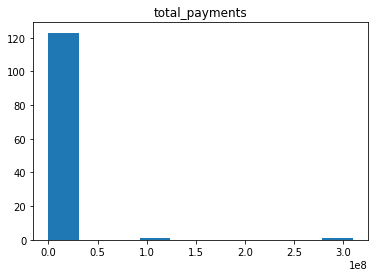

total_payments TOTAL


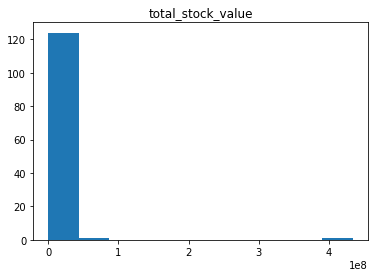

total_stock_value TOTAL


In [46]:
def data_no_nan(columns):
    data = []
    for value in dataset[columns]:
        if value != 'NaN':
            data.append(value)        
    return data

for columns in dataset.columns:
    fig = plt.figure()
    x = data_no_nan(columns)
    ax = fig.add_subplot(111)
    ax.hist(x)
    plt.title(columns)
    plt.show()
    if columns!='email_address':
        newset=dataset[columns].astype(float)
        newsetmax=newset.idxmax()
        print columns,newsetmax
#https://www.jianshu.com/p/2c02a7b0b382
#https://blog.csdn.net/u014365862/article/details/51815562

In [43]:
#删除
dataset.drop(['THE TRAVEL AGENCY IN THE PARK','TOTAL','LOCKHART EUGENE E'],inplace=True)

In [109]:
##Feature processing
#把nan处理

def column_with_npnan(column):
    data = []
    for value in column:
        if value == 'NaN':
            value = np.nan
        data.append(value)
    return np.array(data)
dataset_np = dataset.apply(column_with_npnan)

In [46]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)

In [59]:
feature_list0 = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'expenses', 
                'exercised_stock_options', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 
                'restricted_stock_deferred', 'salary', 'total_payments', 'total_stock_value',
                'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                 'shared_receipt_with_poi']

In [48]:
feature_imp = [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], 
                      [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [49]:
for i in range(len(feature_list0)):
    element = feature_list0[i]
    imp.fit([dataset_np[element]])
    feature_imp[i] = imp.transform([dataset_np[element]])
    feature_imp[i] = feature_imp[i][0]


In [60]:
#http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_imp_scaled = [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], 
                      [0], [0], [0], [0], [0], [0], [0], [0], [0]]
feature_imp_scaled= scaler.fit_transform(feature_imp)
dataset_scaled = pd.DataFrame(feature_imp_scaled)
dataset_scaled.index = feature_list0

In [97]:
dataset_scaled = dataset_scaled.T
dataset_scaled

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,0.233644,0.062432,0.061748,0.088078,0.021352,0.062432,0.044861,0.250233,0.062432,0.062432,...,0.031806,0.043328,0.062432,0.125404,0.036106,0.043813,0.062432,0.062432,0.062432,0.062432
deferral_payments,0.191614,0.026615,0.049126,0.091338,0.016400,0.044325,0.049820,0.147758,0.016758,0.049820,...,0.049535,0.030458,0.049820,0.049820,0.049820,0.030950,0.049820,0.049820,0.049820,0.049820
deferred_income,0.000000,0.000000,0.019454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
director_fees,0.102102,0.023493,0.022780,0.050267,0.010344,0.023493,0.023493,0.079984,0.020463,0.023493,...,0.023571,0.003595,0.023493,0.023493,0.023493,0.004771,0.023493,0.023493,0.023493,0.023493
expenses,0.099656,0.020470,0.021606,0.047589,0.011740,0.022245,0.021649,0.077593,0.022245,0.020764,...,0.022323,0.002239,0.022245,0.022373,0.023197,0.000943,0.022245,0.022245,0.022237,0.022277
exercised_stock_options,0.154900,0.029376,0.161428,0.274738,0.112192,0.076365,0.123988,0.108467,0.020463,0.077232,...,0.078842,0.106138,0.023805,0.135313,0.065769,0.106591,0.123988,0.025220,0.311304,0.027098
loan_advances,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
long_term_incentive,0.109024,0.046489,0.045793,0.101226,0.033650,0.023631,0.046489,0.101649,0.046489,0.046489,...,0.027429,0.009540,0.046489,0.048655,0.046489,0.027553,0.046489,0.046489,0.046489,0.046489
other,0.099214,0.036681,0.049929,0.137814,0.007159,0.020378,0.020368,0.083972,0.036681,0.036681,...,0.020476,0.014719,0.036681,0.030889,0.058359,0.017550,0.026987,0.036681,0.025529,0.036681
restricted_stock,0.103268,0.060529,0.081225,0.181491,0.012331,0.060529,0.024761,0.082219,0.060529,0.050787,...,0.034018,0.014140,0.060529,0.118267,0.505256,0.041872,0.060529,0.060529,0.145582,0.060529


In [81]:
dataset_without_p_e=dataset.drop(['poi','email_address'],axis=1)

Tdataset=dataset_without_p_e
print Tdataset.index
Tdataset_scaled=dataset_scaled
Tdataset_scaled.index= Tdataset.index
print Tdataset_scaled


Index([u'ALLEN PHILLIP K', u'BADUM JAMES P', u'BANNANTINE JAMES M',
       u'BAXTER JOHN C', u'BAY FRANKLIN R', u'BAZELIDES PHILIP J',
       u'BECK SALLY W', u'BELDEN TIMOTHY N', u'BELFER ROBERT',
       u'BERBERIAN DAVID',
       ...
       u'WASAFF GEORGE', u'WESTFAHL RICHARD K', u'WHALEY DAVID A',
       u'WHALLEY LAWRENCE G', u'WHITE JR THOMAS E', u'WINOKUR JR. HERBERT S',
       u'WODRASKA JOHN', u'WROBEL BRUCE', u'YEAGER F SCOTT', u'YEAP SOON'],
      dtype='object', length=143)
                                bonus  deferral_payments  deferred_income  \
ALLEN PHILLIP K              0.233644           0.191614         0.000000   
BADUM JAMES P                0.062432           0.026615         0.000000   
BANNANTINE JAMES M           0.061748           0.049126         0.019454   
BAXTER JOHN C                0.088078           0.091338         0.000000   
BAY FRANKLIN R               0.021352           0.016400         0.000000   
BAZELIDES PHILIP J           0.062432          

In [ ]:
#把poi和email加上df

In [87]:
dataset_scaled=Tdataset_scaled
poi=dataset['poi']
email_address = dataset['email_address']
newdataset_scaled =pd.concat([dataset_scaled, poi, email_address], axis=1)
newdataset_scaled.head()

,bonus,deferral_payments,deferred_income,director_fees,expenses,exercised_stock_options,loan_advances,long_term_incentive,other,restricted_stock,...,salary,total_payments,total_stock_value,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,poi,email_address
ALLEN PHILLIP K,0.233644,0.191614,0.000000,0.102102,0.099656,0.154900,1.0,0.109024,0.099214,0.103268,...,0.105712,0.243608,0.154900,0.099303,0.099211,0.099280,0.099212,0.099255,False,phillip.allen@enron.com
BADUM JAMES P,0.062432,0.026615,0.000000,0.023493,0.020470,0.029376,1.0,0.046489,0.036681,0.060529,...,0.030296,0.026737,0.029376,0.020420,0.020350,0.020369,0.020349,0.020389,False,NaN
BANNANTINE JAMES M,0.061748,0.049126,0.019454,0.022780,0.021606,0.161428,1.0,0.045793,0.049929,0.081225,...,0.019649,0.051740,0.203388,0.019652,0.019634,0.019634,0.019633,0.019649,False,james.bannantine@enron.com
BAXTER JOHN C,0.088078,0.091338,0.000000,0.050267,0.047589,0.274738,1.0,0.101226,0.137814,0.181491,...,0.056304,0.239106,0.409022,0.047278,0.047209,0.047228,0.047209,0.047247,False,NaN
BAY FRANKLIN R,0.021352,0.016400,0.000000,0.010344,0.011740,0.112192,1.0,0.033650,0.007159,0.012331,...,0.015662,0.036532,0.009393,0.007230,0.007159,0.007178,0.007158,0.007198,False,frank.bay@enron.com


In [114]:
dataset=dataset.T
my_dataset=dataset.to_dict()

In [116]:
features_list = ['poi','salary', 'bonus', 'exercised_stock_options', 'deferred_income','from_messages',
                  'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi','expenses', 'long_term_incentive', 'restricted_stock']

data00 = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data00)

from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(11):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

accuracy 0.8
Feature Ranking: 
1 feature salary (0.350693926975)
2 feature bonus (0.196967098082)
3 feature exercised_stock_options (0.172469008264)
4 feature deferred_income (0.143181818182)
5 feature from_messages (0.100892693952)
6 feature from_poi_to_this_person (0.0357954545455)
7 feature from_this_person_to_poi (0.0)
8 feature shared_receipt_with_poi (0.0)
9 feature expenses (0.0)
10 feature long_term_incentive (0.0)
11 feature restricted_stock (0.0)


In [117]:
from tester import test_classifier,dump_classifier_and_data,load_classifier_and_data,main

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import neighbors

from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

clf01 =  AdaBoostClassifier()
clf02 =  RandomForestClassifier(min_samples_split=50)
clf03 =  GaussianNB()

clf04 =  neighbors.KNeighborsClassifier()
clf05 =  QuadraticDiscriminantAnalysis()



In [119]:
#features_list01 = ['poi','salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages','expenses', 'long_term_incentive',
#                  'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
features_list01 = ['poi','salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages','expenses', 'long_term_incentive',
                  'from_poi_to_this_person']

In [120]:
from sklearn.cross_validation import train_test_split
data01 = featureFormat(my_dataset, features_list01, sort_keys = True)
labels01, features01 = targetFeatureSplit(data01)
features_train01, features_test01, labels_train01, labels_test01 = \
    train_test_split(features01, labels01, test_size=0.3, random_state=42)
    

In [121]:
dump_classifier_and_data(clf01, my_dataset, features_list01)
load_classifier_and_data()
print features_list01
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages', 'expenses', 'long_term_incentive', 'from_poi_to_this_person']
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
	Accuracy: 0.85950	Precision: 0.51085	Recall: 0.38850	F1: 0.44135	F2: 0.40805
	Total predictions: 14000	True positives:  777	False positives:  744	False negatives: 1223	True negatives: 11256



In [122]:
dump_classifier_and_data(clf02, my_dataset, features_list01)
load_classifier_and_data()
print features_list01
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages', 'expenses', 'long_term_incentive', 'from_poi_to_this_person']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85714	Precision: 0.50000	Recall: 0.08400	F1: 0.14384	F2: 0.10077
	Total predictions: 14000	True positives:  168	False positives:  168	False negatives: 1832	True negatives: 11832



In [123]:
dump_classifier_and_data(clf03, my_dataset, features_list01)
load_classifier_and_data()
print features_list01
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages', 'expenses', 'long_term_incentive', 'from_poi_to_this_person']
GaussianNB(priors=None)
	Accuracy: 0.84979	Precision: 0.46918	Recall: 0.39200	F1: 0.42713	F2: 0.40534
	Total predictions: 14000	True positives:  784	False positives:  887	False negatives: 1216	True negatives: 11113



In [124]:
dump_classifier_and_data(clf04, my_dataset, features_list01)
load_classifier_and_data()
print features_list01
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages', 'expenses', 'long_term_incentive', 'from_poi_to_this_person']
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
	Accuracy: 0.86621	Precision: 0.58687	Recall: 0.21450	F1: 0.31417	F2: 0.24568
	Total predictions: 14000	True positives:  429	False positives:  302	False negatives: 1571	True negatives: 11698



In [125]:
dump_classifier_and_data(clf05, my_dataset, features_list01)
load_classifier_and_data()
print features_list01
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_messages', 'expenses', 'long_term_incentive', 'from_poi_to_this_person']
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
	Accuracy: 0.84221	Precision: 0.43227	Recall: 0.33350	F1: 0.37652	F2: 0.34947
	Total predictions: 14000	True positives:  667	False positives:  876	False negatives: 1333	True negatives: 11124



In [127]:
#01可留
features_list02=['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

In [128]:
from sklearn.cross_validation import train_test_split
data02 = featureFormat(my_dataset, features_list02, sort_keys = True)
labels02, features02 = targetFeatureSplit(data02)
features_train02, features_test02, labels_train02, labels_test02 = \
    train_test_split(features02, labels02, test_size=0.3, random_state=42)

In [129]:
dump_classifier_and_data(clf01, my_dataset, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
	Accuracy: 0.81543	Precision: 0.32473	Recall: 0.27050	F1: 0.29514	F2: 0.27985
	Total predictions: 14000	True positives:  541	False positives: 1125	False negatives: 1459	True negatives: 10875



In [130]:
dump_classifier_and_data(clf02, my_dataset, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85464	Precision: 0.45700	Recall: 0.09300	F1: 0.15455	F2: 0.11062
	Total predictions: 14000	True positives:  186	False positives:  221	False negatives: 1814	True negatives: 11779



In [131]:
dump_classifier_and_data(clf03, my_dataset, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
GaussianNB(priors=None)
	Accuracy: 0.84514	Precision: 0.44459	Recall: 0.33700	F1: 0.38339	F2: 0.35414
	Total predictions: 14000	True positives:  674	False positives:  842	False negatives: 1326	True negatives: 11158



In [132]:
dump_classifier_and_data(clf04, my_dataset, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
	Accuracy: 0.89129	Precision: 0.78520	Recall: 0.32900	F1: 0.46371	F2: 0.37226
	Total predictions: 14000	True positives:  658	False positives:  180	False negatives: 1342	True negatives: 11820



In [133]:
dump_classifier_and_data(clf05, my_dataset, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
	Accuracy: 0.82829	Precision: 0.36515	Recall: 0.27350	F1: 0.31275	F2: 0.28796
	Total predictions: 14000	True positives:  547	False positives:  951	False negatives: 1453	True negatives: 11049



In [ ]:
#总结，04 Accuracy: 0.81043	Precision: 0.33248	Recall: 0.32450	F1: 0.32844	F2: 0.32607
	Total predictions: 14000	True positives:  649	False positives: 1303	False negatives: 1351	True negatives: 10697

In [ ]:
#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [165]:
#用缩放后的数据
#newdataset_scaled
newdataset_scaled=newdataset_scaled.T
my_dataset2=newdataset_scaled.to_dict()


In [183]:
from sklearn.cross_validation import train_test_split
data03 = featureFormat(my_dataset2, features_list02, sort_keys = True)
labels03, features03 = targetFeatureSplit(data03)
features_train03, features_test03, labels_train03, labels_test03 = \
    train_test_split(features03, labels03, test_size=0.3, random_state=42)
    

In [184]:
dump_classifier_and_data(clf02, my_dataset2, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf03, my_dataset2, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf04, my_dataset2, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf05, my_dataset2, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.84580	Precision: 0.25040	Recall: 0.07850	F1: 0.11953	F2: 0.09099
	Total predictions: 15000	True positives:  157	False positives:  470	False negatives: 1843	True negatives: 12530

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
GaussianNB(priors=None)
	Accuracy: 0.17913	Precision: 0.13832	Recall: 0.98600	

In [ ]:
#缩放后调参

In [185]:

data000 = featureFormat(my_dataset2, features_list02, sort_keys = True)
labels000, features000 = targetFeatureSplit(data000)
features_train000, features_test000, labels_train000, labels_test000 = \
    train_test_split(features000, labels000, test_size=0.3, random_state=42)

#开始调优使用GridSearchCV找到,最优参数
knn = KNeighborsClassifier()
#设置k的范围
k_range = list(range(1,31))
leaf_range = list(range(1,2))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)
gridKNN = GridSearchCV(knn,param_gridknn,cv=10,scoring='accuracy',verbose=1)
gridKNN.fit(features_train000,labels_train000)
print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))
#https://blog.csdn.net/szj_huhu/article/details/74909773

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
('best score is:', '0.87')
('best params are:', "{'n_neighbors': 2, 'weights': 'uniform', 'leaf_size': 1, 'algorithm': 'auto'}")


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   12.2s finished


In [186]:
data000 = featureFormat(my_dataset2, features_list02, sort_keys = True)
labels000, features000 = targetFeatureSplit(data000)
features_train000, features_test000, labels_train000, labels_test000 = \
    train_test_split(features000, labels000, test_size=0.3, random_state=42)
clf07 =  KNeighborsClassifier(n_neighbors=2, weights='uniform',leaf_size=1,algorithm='auto')
dump_classifier_and_data(clf07, my_dataset2, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
	Accuracy: 0.87787	Precision: 0.70588	Recall: 0.14400	F1: 0.23920	F2: 0.17127
	Total predictions: 15000	True positives:  288	False positives:  120	False negatives: 1712	True negatives: 12880



In [177]:
#未缩放特征的调参

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
data001 = featureFormat(my_dataset, features_list02, sort_keys = True)
labels001, features001 = targetFeatureSplit(data001)
features_train001, features_test001, labels_train001, labels_test001 = \
    train_test_split(features001, labels001, test_size=0.3, random_state=42)

#开始调优使用GridSearchCV找到,最优参数
knn = KNeighborsClassifier()
#设置k的范围
k_range = list(range(1,31))
leaf_range = list(range(1,2))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
param_gridknn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)
gridKNN = GridSearchCV(knn,param_gridknn,cv=10,scoring='accuracy',verbose=1)
gridKNN.fit(features_train001,labels_train001)
#print('best score is:',str(gridKNN.best_score_))
print('best params are:',str(gridKNN.best_params_))

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
('best params are:', "{'n_neighbors': 3, 'weights': 'uniform', 'leaf_size': 1, 'algorithm': 'auto'}")


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   12.4s finished


In [193]:

clf08 =  KNeighborsClassifier(n_neighbors=3, weights='uniform',leaf_size=1,algorithm='auto')
dump_classifier_and_data(clf08, my_dataset, features_list02)
load_classifier_and_data()
print features_list02
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.87743	Precision: 0.61873	Recall: 0.37000	F1: 0.46308	F2: 0.40235
	Total predictions: 14000	True positives:  740	False positives:  456	False negatives: 1260	True negatives: 11544



In [ ]:
#新特征

In [208]:
newdataset_scaled=newdataset_scaled.T
newdataset_scaled

,bonus,deferral_payments,deferred_income,director_fees,expenses,exercised_stock_options,loan_advances,long_term_incentive,other,restricted_stock,...,salary,total_payments,total_stock_value,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,poi,email_address
ALLEN PHILLIP K,0.233644,0.191614,0,0.102102,0.099656,0.1549,1,0.109024,0.0992144,0.103268,...,0.105712,0.243608,0.1549,0.0993029,0.099211,0.0992802,0.0992116,0.0992548,False,phillip.allen@enron.com
BADUM JAMES P,0.0624324,0.0266154,0,0.0234932,0.0204698,0.0293762,1,0.046489,0.0366809,0.0605292,...,0.0302961,0.0267374,0.0293762,0.0204203,0.02035,0.020369,0.0203491,0.0203889,False,NaN
BANNANTINE JAMES M,0.0617481,0.0491261,0.0194538,0.0227804,0.0216057,0.161428,1,0.045793,0.0499293,0.081225,...,0.0196494,0.0517402,0.203388,0.0196525,0.019634,0.0196337,0.0196326,0.0196489,False,james.bannantine@enron.com
BAXTER JOHN C,0.0880777,0.0913384,0,0.0502665,0.0475887,0.274738,1,0.101226,0.137814,0.181491,...,0.0563044,0.239106,0.409022,0.0472779,0.0472095,0.047228,0.0472087,0.0472473,False,NaN
BAY FRANKLIN R,0.0213525,0.0164,0,0.0103442,0.0117396,0.112192,1,0.0336496,0.00715877,0.0123307,...,0.0156623,0.0365316,0.00939271,0.00722992,0.00715862,0.00717792,0.00715778,0.00719807,False,frank.bay@enron.com
BAZELIDES PHILIP J,0.0624324,0.0443249,0,0.0234932,0.0222454,0.0763653,1,0.0236307,0.0203783,0.0605292,...,0.0231778,0.0504687,0.0763653,0.0204203,0.02035,0.020369,0.0203491,0.0203889,False,NaN
BECK SALLY W,0.0448609,0.0498196,0,0.0234932,0.0216494,0.123988,1,0.046489,0.0203675,0.024761,...,0.0284486,0.0542833,0.024761,0.0206039,0.0203527,0.0204998,0.0203612,0.0204401,False,sally.beck@enron.com
BELDEN TIMOTHY N,0.250233,0.147758,0,0.0799836,0.0775926,0.108467,1,0.101649,0.0839716,0.0822187,...,0.0840805,0.258535,0.113666,0.0772837,0.0770276,0.077036,0.0770236,0.0772022,True,tim.belden@enron.com
BELFER ROBERT,0.0624324,0.0167583,0,0.0204627,0.0222454,0.0204627,1,0.046489,0.0366809,0.0605292,...,0.0302961,0.0239371,0.0188036,0.0204203,0.02035,0.020369,0.0203491,0.0203889,False,NaN
BERBERIAN DAVID,0.0624324,0.0498196,0,0.0234932,0.0207641,0.0772322,1,0.046489,0.0366809,0.0507868,...,0.0279321,0.0283486,0.107671,0.0204203,0.02035,0.020369,0.0203491,0.0203889,False,david.berberian@enron.com


In [202]:
dataset=dataset.T

In [203]:
dataset['coefficient_bonus_salary'] = 0.0

In [204]:
dataset

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,coefficient_bonus_salary
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,0.0
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817,0.0
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,864523,False,1757552,-560222,477,465,566,916197,5243487,0.0
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258,0.0
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,69,False,145796,-82782,239671,NaN,NaN,827696,63014,0.0
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641,0.0
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,566,False,126027,NaN,231330,2639,7315,969068,126027,0.0
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,210698,True,157569,NaN,213999,5521,7991,5501630,1110705,0.0
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093,0.0
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616,0.0


In [209]:
for i in range(len(newdataset_scaled['salary'])):
    if newdataset_scaled['salary'][i] > 0:
        dataset['coefficient_bonus_salary'][i] = \
        1.0 * newdataset_scaled['bonus'][i] / newdataset_scaled['salary'][i]

In [210]:
dataset

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,coefficient_bonus_salary
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,2.210184
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817,2.060740
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,864523,False,1757552,-560222,477,465,566,916197,5243487,3.142497
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258,1.564313
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,69,False,145796,-82782,239671,NaN,NaN,827696,63014,1.363301
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641,2.693624
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,566,False,126027,NaN,231330,2639,7315,969068,126027,1.576910
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,210698,True,157569,NaN,213999,5521,7991,5501630,1110705,2.976116
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093,2.060740
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616,2.235145


In [216]:
datasetT=dataset.T
my_dataset3=datasetT.to_dict()

In [218]:
features_list03=['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi','coefficient_bonus_salary'] 
data04 = featureFormat(my_dataset3, features_list03, sort_keys = True)
labels04, features04 = targetFeatureSplit(data04)
features_train04, features_test04, labels_train04, labels_test03 = \
    train_test_split(features04, labels04, test_size=0.3, random_state=42)

In [219]:

dump_classifier_and_data(clf01, my_dataset3, features_list03)
load_classifier_and_data()
print features_list03
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf02, my_dataset3, features_list03)
load_classifier_and_data()
print features_list03
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf03, my_dataset3, features_list03)
load_classifier_and_data()
print features_list03
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf04, my_dataset3, features_list03)
load_classifier_and_data()
print features_list03
if __name__ == '__main__':
    main()
    
dump_classifier_and_data(clf05, my_dataset3, features_list03)
load_classifier_and_data()
print features_list03
if __name__ == '__main__':
    main()

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'coefficient_bonus_salary']
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
	Accuracy: 0.81387	Precision: 0.28194	Recall: 0.25600	F1: 0.26834	F2: 0.26080
	Total predictions: 15000	True positives:  512	False positives: 1304	False negatives: 1488	True negatives: 11696

['poi', 'salary', 'bonus', 'exercised_stock_options', 'deferred_income', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'coefficient_bonus_salary']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators